# PROJECT:`Resume Tailoring`

### Resume tailoring

A company has a requirement for diffrent job roles And your manager wants you to do some basic analysis for him.

For most job openings, a particular skill set is desired to perform specific tasks. Tailoring your resume is about recognizing those skills and responsibilities on the job description and making it obvious that you’re up to the task. Your company's goal is to draw the shortest line possible between your experience and what’s stated in the job description.

Tailoring your resume connects the dots for recruiters and hiring managers who are overwhelmed by a flood of generic applicants. Instead of proving that you’re an experienced professional in general, it shows them that you’re a perfect fit for this specific job.

 


### About the dataset
When performing data science tasks, it’s common to use data found on the internet. You’ll usually be able to access this data in CSV format, or via an Application Programming Interface (API). However, there are times when the data you want can only be accessed as part of a web page. In cases like this, you’ll want to use a technique called web scraping to get the data from the web page into a format you can work within your analysis.

The scraped data is avaible on `Greyatom platform `in the form of `csv`.

|Feature|Description|
|-----|-----|
|company| Name of the company|
|job| job title|
|job_desc| description of jobs|
|location|job locaton|
|url|Link of the jobs from it was scraped|
|job_type|type of the job|

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import re
import spacy
import gensim
from gensim import corpora
pd.set_option("display.max_colwidth", 200)

import operator
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 

import nltk
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
from collections import Counter
import operator

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline



### Loading the dataset 

In [2]:
jobs = pd.read_csv("merged_indeed_new.csv")
jobs.head()

,company,job,job_desc,location,url,job_type
0,Micro Focus,Core Java Developer,"Core Java Developer\r\r\n\r\r\nJob Description:\r\r\n\r\r\nAt Micro Focus, everything we do is based on a simple idea: The fastest way to get results is to build on what you have. Our software sol...",Bangalore,https://www.indeed.co.in/pagead/clk?mo=r&ad=-6NYlbfkN0BduEgvIgdT7EDM_O2GxHkw7QoaouEWjxefAvaX3ZwZ9tYBt705y4baMnhcBFo_61Er-rE59t0DIcl816jpSPhQlE2-XsX8ZtBLxXVsMZdq8VWbZfs3uXN1oqCxQ7zxUL2JTHVmAEZthPEL...,Android Developer
1,MS Clinical Research (P) Ltd,Android App Developer,"Job Summary\r\r\nOver 3 years experience designing, developing, integrating, and supporting Android App development\r\r\nApply in-depth understanding of business and IT requirements to streamline ...",Bangalore,https://www.indeed.co.in/pagead/clk?mo=r&ad=-6NYlbfkN0BduEgvIgdT7EDM_O2GxHkw7QoaouEWjxefAvaX3ZwZ9tYBt705y4baMnhcBFo_61Er-rE59t0DIcl816jpSPhQlE2-XsX8ZtBLxXVsMZdq8VWbZfs3uXN1oqCxQ7zxUL2JTHVmAEZthPEL...,Android Developer
2,Applied Materials Inc.,Software Engineer – Unity Developer,"Company Introduction\r\r\nApplied Materials , Inc. is the global leader in materials engineering solutions for the semiconductor, flat panel display and solar photovoltaic (PV) industries. applied...",Bangalore,https://www.indeed.co.in/pagead/clk?mo=r&ad=-6NYlbfkN0BduEgvIgdT7EDM_O2GxHkw7QoaouEWjxefAvaX3ZwZ9tYBt705y4baMnhcBFo_61Er-rE59t0DIcl816jpSPhQlE2-XsX8ZtBLxXVsMZdq8VWbZfs3uXN1oqCxQ7zxUL2JTHVmAEZthPEL...,Android Developer
3,Shaw Academy,Lead Mobile Developer,"Senior Mobile App Developer/Lead (Android or iOS)\r\r\nShaw Academy is seeking a Mobile Development Lead, initially to be the hands-on coder for our apps and then to build a team aroundyou. The ro...",Bangalore,https://www.indeed.co.in/pagead/clk?mo=r&ad=-6NYlbfkN0BduEgvIgdT7EDM_O2GxHkw7QoaouEWjxefAvaX3ZwZ9tYBt705y4baMnhcBFo_61Er-rE59t0DIcl816jpSPhQlE2-XsX8ZtBLxXVsMZdq8VWbZfs3uXN1oqCxQ7zxUL2JTHVmAEZthPEL...,Android Developer
4,Letsgettin Private Limited,Android Developer- Freshers,Job Summary\r\r\nPosition: Android developer\r\r\nEducation: Bachelor's\r\r\nRequired candidates: Freshers\r\r\nResponsibilities and Duties\r\r\nDesign and build advanced applications for the Andr...,Bangalore,https://www.indeed.co.in/pagead/clk?mo=r&ad=-6NYlbfkN0BduEgvIgdT7EDM_O2GxHkw7QoaouEWjxefAvaX3ZwZ9tYBt705y4baMnhcBFo_61Er-rE59t0DIcl816jpSPhQlE2-XsX8ZtBLxXVsMZdq8VWbZfs3uXN1oqCxQ7zxUL2JTHVmAEZthPEL...,Android Developer


### Drop unnecessary Columns

For the analysis of the job description, we are only interested in the text data associated with the jobs. We will analyze this text data using natural language processing. Since the file contains some metadata such as company, location and url. It is necessary to remove all the columns that do not contain useful text information.

In [3]:
jobs.drop(['company', 'location', 'url'], axis=1, inplace=True)

In [4]:
count=jobs.job_type.value_counts()
count

Data Analyst                 78
Front End Developer          74
Full Stack Web Developer     71
Android Developer            70
Machine Learning Engineer    69
Backend Developer            68
Data Scientist               66
Ios Developer                59
Journalist                   47
Name: job_type, dtype: int64

# Data Cleaning on texual data

#### I have to focus on`job_desc` which is text data and it will give me the insight of requirment.
#### it is textual  data so from here i will use the nlp
1.Requirment is devided on the basis on role of job but overall it categories in job_type so i am going to merge all similar  job_type data to one text(`job_desc`)

2.I will perform some simple preprocessing on the job description column(i.e `job_desc`) in order to make them more amenable for analysis. i will use a regular expression to retain only alphabets in the description and remove unnecessary space.



In [5]:
#job types
types=jobs.job_type.unique().tolist()
types

['Android Developer',
 'Backend Developer',
 'Data Analyst',
 'Data Scientist',
 'Front End Developer',
 'Full Stack Web Developer',
 'Ios Developer',
 'Journalist',
 'Machine Learning Engineer']

In [6]:
# Removing Regular expression
def clean_nonalpha_spaces(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(' +', ' ', text)
    return text

In [7]:
# lower case and removing the lower case of data
jobs.job_desc=jobs.job_desc.apply(clean_nonalpha_spaces).str.lower()
new_data={}
for t in types:
    new_data[t]=''.join(jobs[jobs.job_type.isin([t])].job_desc)
#new_data

In [8]:
#dataframe on the basis of job types
df=pd.DataFrame(new_data.values(),index=new_data.keys(),columns=['job_desc'])
df

,job_desc
Android Developer,core java developer job description at micro focus everything we do is based on a simple idea the fastest way to get results is to build on what you have our software solutions enable organization...
Backend Developer,job summary the core role and responsibility will be around developing the backend infrastructure and develop for client side requirements for styldod below are the brief details about the company...
Data Analyst,the vendor master data analyst is part of a global team who establishes and follows procedures that maintain the integrity of data for master data in sap these procedures allow business objectives...
Data Scientist,the vendor master data analyst is part of a global team who establishes and follows procedures that maintain the integrity of data for master data in sap these procedures allow business objectives...
Front End Developer,job description job summary as tyremarket com looks to continue it s growth into we are looking for some talented new teammates we are currently looking for ui ux developers to work in our bangalo...
Full Stack Web Developer,as a software engineer senior ii lead you will be focused on building highly usable reliable and scalable software solutions that will be at the forefront of handling customer engagements within t...
Ios Developer,job summary ios developer experience years ability to work on parallel projects and adapt at prioritizing projects write quality scalable maintainable code modify enhance existing functionality ad...
Journalist,wipro limited is looking for a senior communications professional to help develop and execute its pr strategy and communicate its messages to targeted media across geographies the role entails wor...
Machine Learning Engineer,requisition id work area software design and development expected travel career status professional employment type regular full time company description sap started in as a team of five colleague...


### Document-Term Matrix

For many of the techniques we'll be using in future notebooks, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. i can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.

In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [9]:
#stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df.index

Index(['Android Developer', 'Backend Developer', 'Data Analyst',
       'Data Scientist', 'Front End Developer', 'Full Stack Web Developer',
       'Ios Developer', 'Journalist', 'Machine Learning Engineer'],
      dtype='object')

In [10]:
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df.job_desc)
data_dtm = pd.DataFrame(data_cv.toarray(), index=df.index,columns=cv.get_feature_names())
data=data_dtm.T

In [11]:
"'I have to see the data behaviour after Lemmantize'"

"'I have to see the data behaviour after Lemmantize'"

# Exploratory Data Analysis

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each job_type:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words 
3. **Amount of profanity** - most common terms

In [12]:
# Find the top 30 requirmnts words 
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Android Developer': [('android', 340),
  ('experience', 255),
  ('development', 183),
  ('design', 137),
  ('knowledge', 128),
  ('mobile', 107),
  ('work', 101),
  ('preferred', 100),
  ('job', 98),
  ('applications', 91),
  ('year', 88),
  ('skills', 87),
  ('required', 76),
  ('app', 73),
  ('developer', 71),
  ('working', 67),
  ('code', 65),
  ('years', 63),
  ('java', 62),
  ('technologies', 62),
  ('apis', 59),
  ('application', 59),
  ('time', 57),
  ('build', 54),
  ('services', 54),
  ('understanding', 53),
  ('sdk', 52),
  ('salary', 52),
  ('type', 51),
  ('strong', 50)],
 'Backend Developer': [('experience', 267),
  ('development', 111),
  ('web', 110),
  ('skills', 108),
  ('preferred', 103),
  ('work', 102),
  ('knowledge', 102),
  ('design', 97),
  ('job', 96),
  ('required', 93),
  ('years', 92),
  ('applications', 87),
  ('understanding', 82),
  ('code', 79),
  ('end', 78),
  ('time', 75),
  ('javascript', 69),
  ('backend', 67),
  ('year', 65),
  ('html', 62),
  ('

In [13]:
# Print the top 15 is in each job_type
for job_type, top_words in top_dict.items():
    print(job_type)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Android Developer
android, experience, development, design, knowledge, mobile, work, preferred, job, applications, year, skills, required, app
---
Backend Developer
experience, development, web, skills, preferred, work, knowledge, design, job, required, years, applications, understanding, code
---
Data Analyst
data, business, experience, work, research, skills, job, team, time, role, information, required, analysis, analyst
---
Data Scientist
data, experience, learning, business, analytics, machine, work, skills, years, analysis, job, solutions, knowledge, services
---
Front End Developer
experience, web, end, job, development, work, design, preferred, html, required, javascript, css, year, knowledge
---
Full Stack Web Developer
experience, web, development, work, skills, years, job, design, data, preferred, knowledge, year, team, end
---
Ios Developer
experience, ios, development, design, mobile, applications, knowledge, job, year, preferred, skills, android, app, work
---
Journalist


**💡 Insight:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.

In [23]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each job_type
words = []
for job_type in data.columns:
    top = [word for (word, count) in top_dict[job_type]]
    for t in top:
        words.append(t)
        
#words

In [24]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('experience', 9),
 ('work', 9),
 ('job', 9),
 ('skills', 9),
 ('required', 9),
 ('years', 9),
 ('knowledge', 8),
 ('time', 8),
 ('team', 8),
 ('development', 7),
 ('preferred', 7),
 ('design', 6),
 ('year', 6),
 ('working', 6),
 ('applications', 5),
 ('developer', 5),
 ('services', 5),
 ('data', 5),
 ('code', 4),
 ('understanding', 4),
 ('type', 4),
 ('strong', 4),
 ('technologies', 3),
 ('application', 3),
 ('salary', 3),
 ('web', 3),
 ('end', 3),
 ('javascript', 3),
 ('html', 3),
 ('css', 3),
 ('good', 3),
 ('js', 3),
 ('business', 3),
 ('ability', 3),
 ('requirements', 3),
 ('analytics', 3),
 ('technology', 3),
 ('android', 2),
 ('mobile', 2),
 ('app', 2),
 ('analysis', 2),
 ('education', 2),
 ('learning', 2),
 ('machine', 2),
 ('solutions', 2),
 ('python', 2),
 ('science', 2),
 ('like', 2),
 ('responsibilities', 2),
 ('software', 2),
 ('java', 1),
 ('apis', 1),
 ('build', 1),
 ('sdk', 1),
 ('backend', 1),
 ('php', 1),
 ('research', 1),
 ('role', 1),
 ('information', 1),
 ('analys

In [25]:
# If more than half of the job_type have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['experience',
 'work',
 'job',
 'skills',
 'required',
 'years',
 'knowledge',
 'time',
 'team',
 'development',
 'preferred']

In [26]:
# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [27]:
# Let's update our document-term matrix with the new list of stop word
# Recreate document-term matrix
cv= CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(df.job_desc)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = df.index

In [28]:
# new Term matrix
data_stop

,aaa,aaai,aadhar,aao,ab,abandoned,abap,abfl,abhfl,abhijit,...,zeta,zettamine,zip,zippr,zone,zones,zookeeper,zoom,zurich,zycus
Android Developer,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Backend Developer,0,0,2,0,0,0,4,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Data Analyst,0,0,0,1,3,1,0,1,1,1,...,1,0,0,0,4,1,0,1,0,0
Data Scientist,0,2,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,3,0,1,8
Front End Developer,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Full Stack Web Developer,0,0,0,0,2,0,0,0,0,0,...,0,0,1,3,2,0,0,0,0,0
Ios Developer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Journalist,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Machine Learning Engineer,0,0,0,0,3,0,0,0,0,1,...,0,0,0,0,0,2,0,0,0,0


In [29]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [30]:
df.job_desc

Android Developer            core java developer job description at micro focus everything we do is based on a simple idea the fastest way to get results is to build on what you have our software solutions enable organization...
Backend Developer            job summary the core role and responsibility will be around developing the backend infrastructure and develop for client side requirements for styldod below are the brief details about the company...
Data Analyst                 the vendor master data analyst is part of a global team who establishes and follows procedures that maintain the integrity of data for master data in sap these procedures allow business objectives...
Data Scientist               the vendor master data analyst is part of a global team who establishes and follows procedures that maintain the integrity of data for master data in sap these procedures allow business objectives...
Front End Developer          job description job summary as tyremarket com looks to 

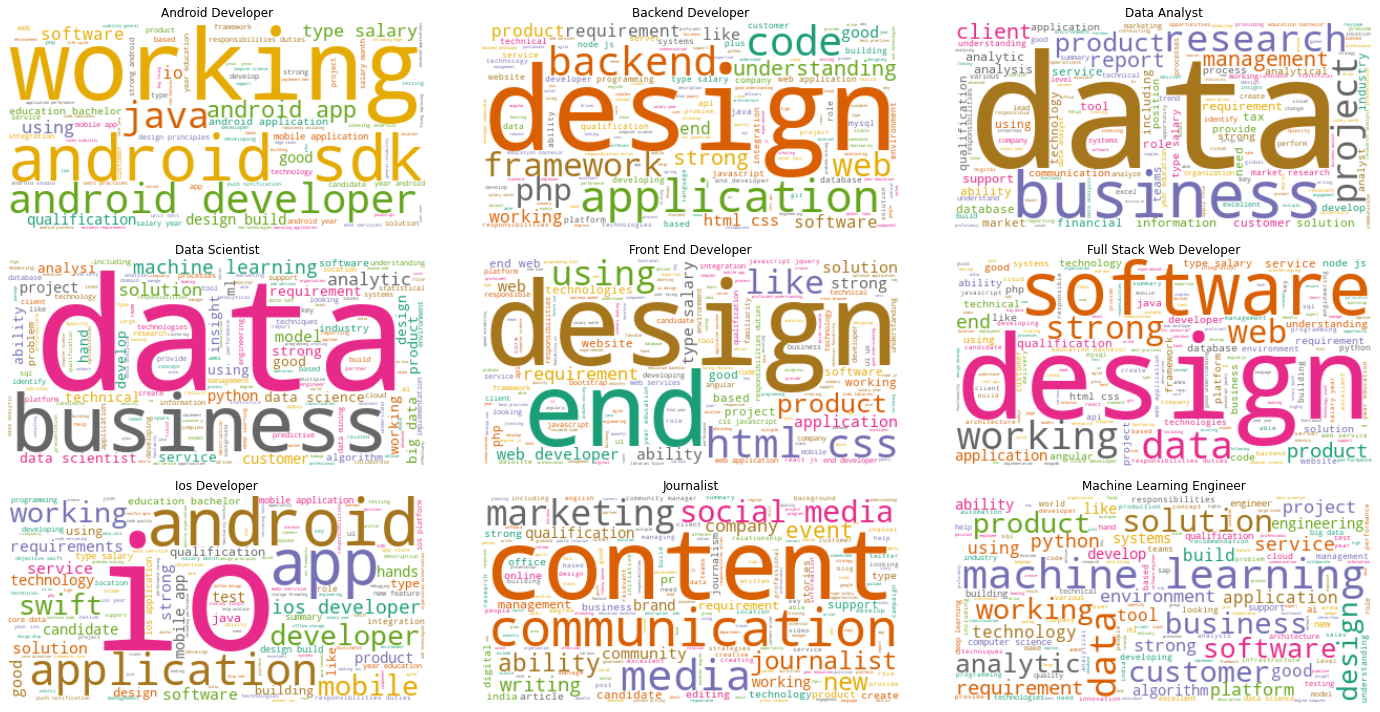

In [31]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]

# Create subplots for each job_type
for index, job_type in enumerate(data.columns):
    wc.generate(df.job_desc[job_type])
    
    plt.subplot(3, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(job_type)
plt.tight_layout()    
plt.show()

## 💡 finding:

1. Data, Bussiness and core lenguage are necessary for more profile.
2. As i am learning the Data science its make me curious to dig the data more!


#### Basic insight from `job` and `job_type`
#### # Calculate the number of jobs for each job type. 

In [32]:
count=jobs.job_type.value_counts()
count

Data Analyst                 78
Front End Developer          74
Full Stack Web Developer     71
Android Developer            70
Machine Learning Engineer    69
Backend Developer            68
Data Scientist               66
Ios Developer                59
Journalist                   47
Name: job_type, dtype: int64

Total Recruitment:  602


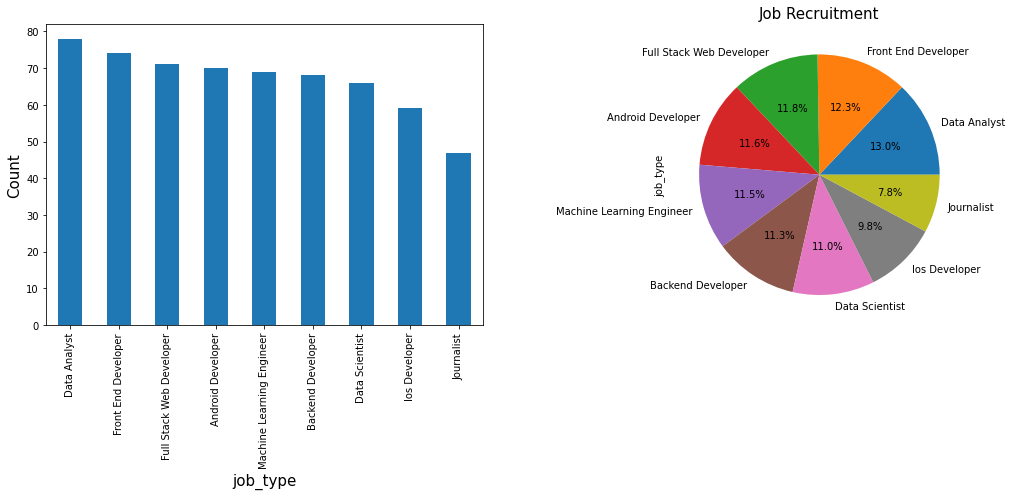

In [33]:
plt.figure(figsize=(15,7))
plt.subplot(121)
count.plot(kind='bar')
plt.xlabel('job_type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.subplot(122)
count.plot.pie(autopct='%1.1f%%')
plt.title('Job Recruitment',fontsize=15)
plt.tight_layout()
print('Total Recruitment: ', count.sum())
plt.show()


#### Recruitment for diffrent role for diffrent jobtypes

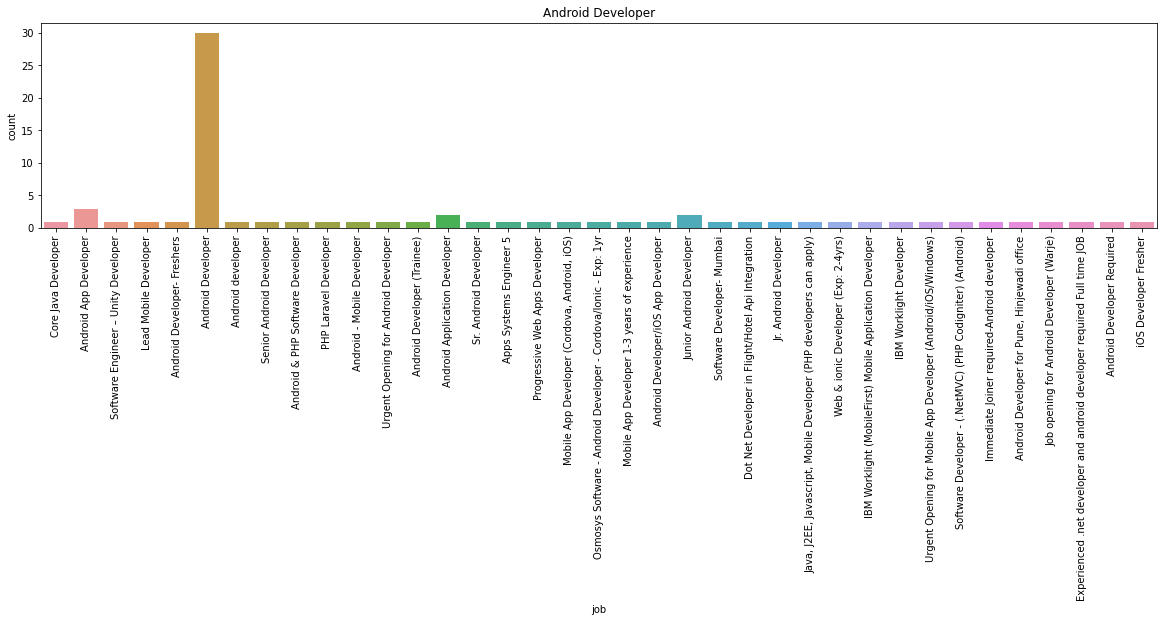

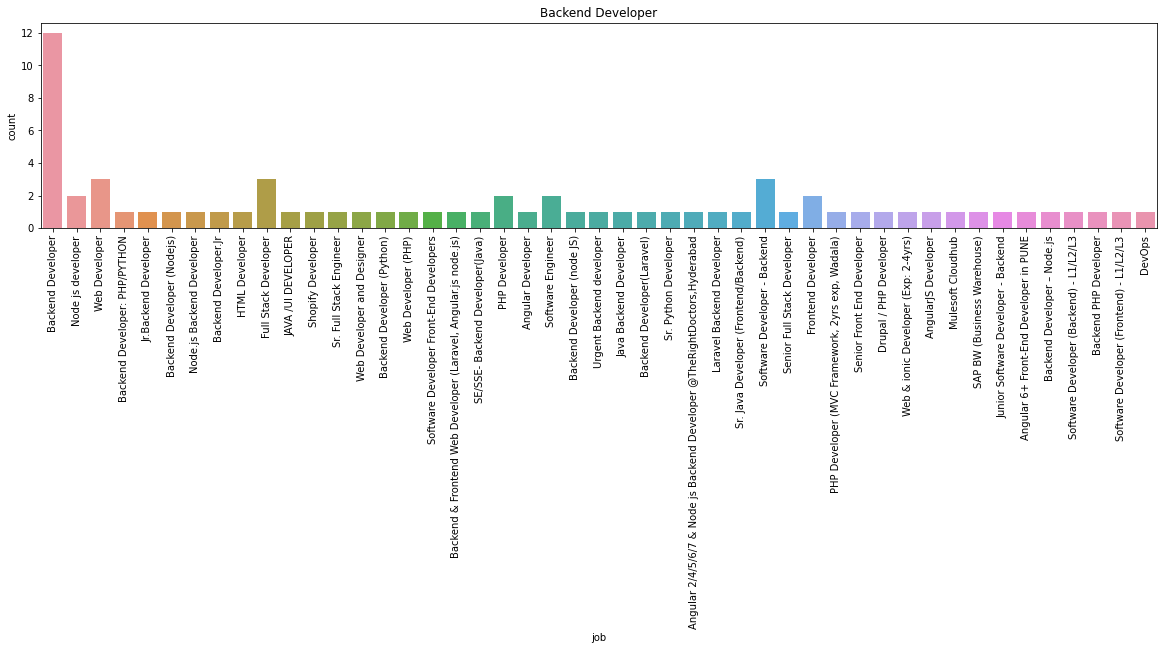

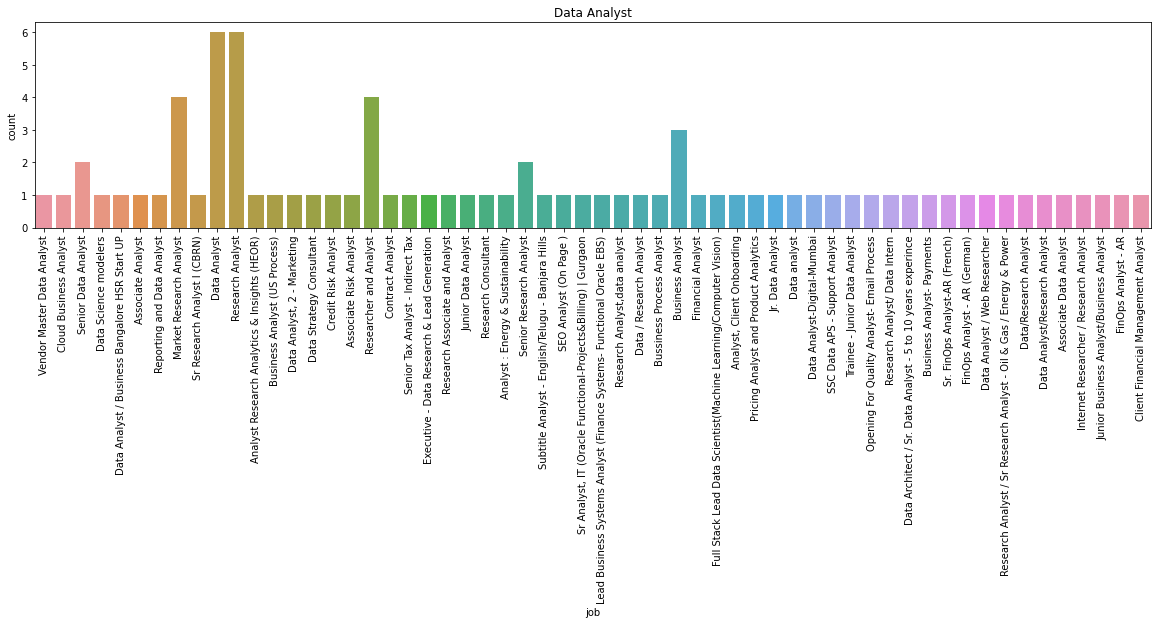

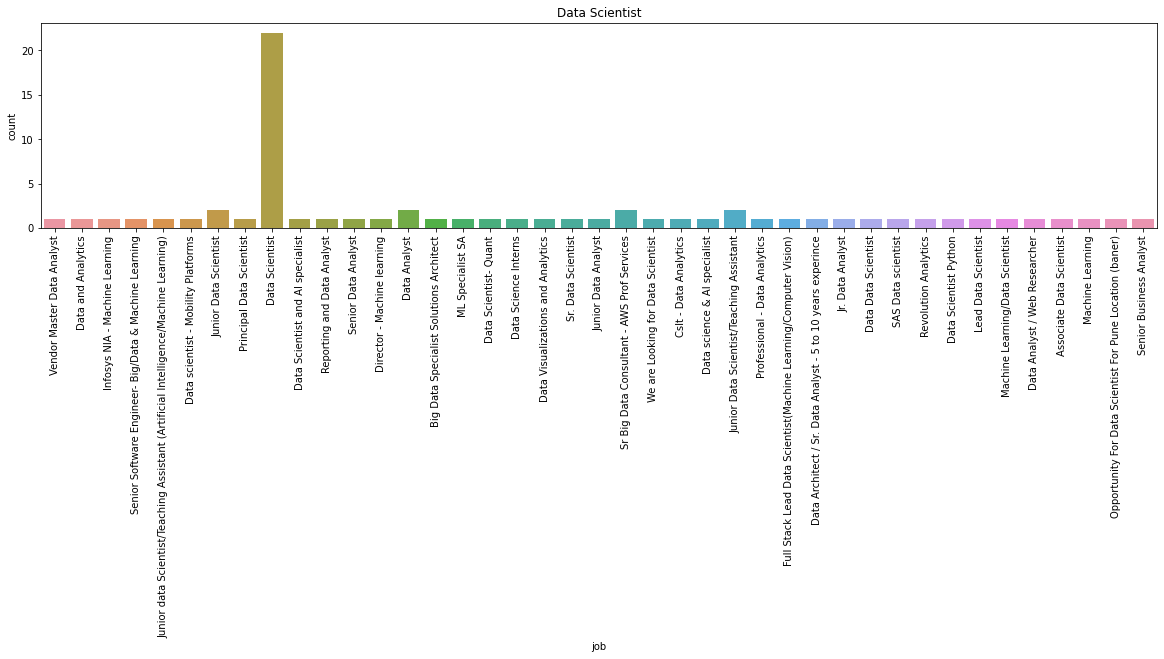

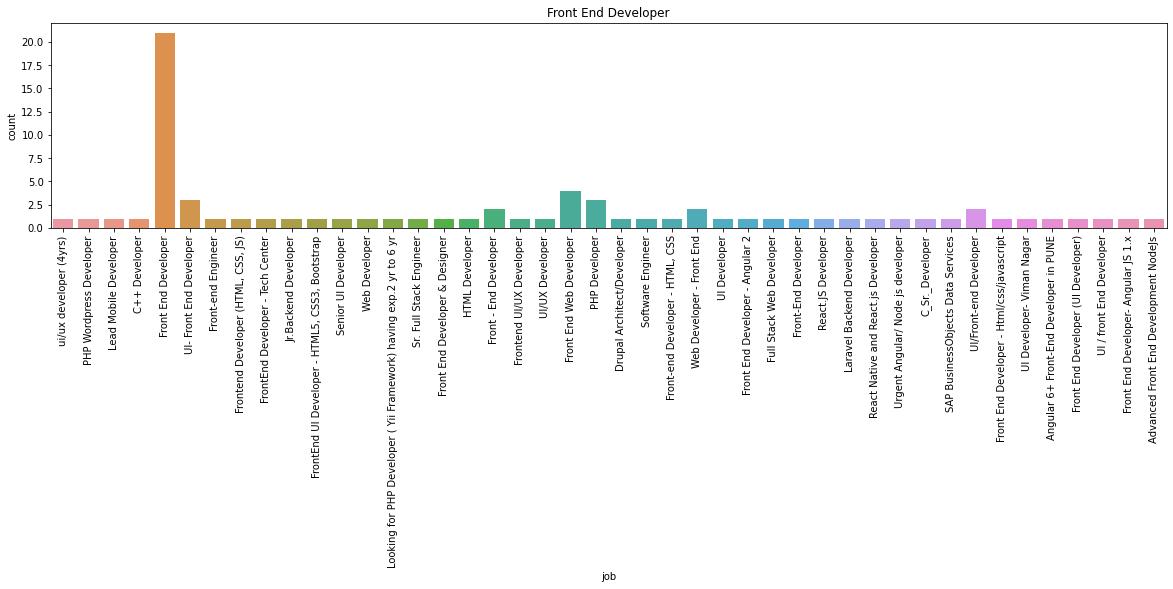

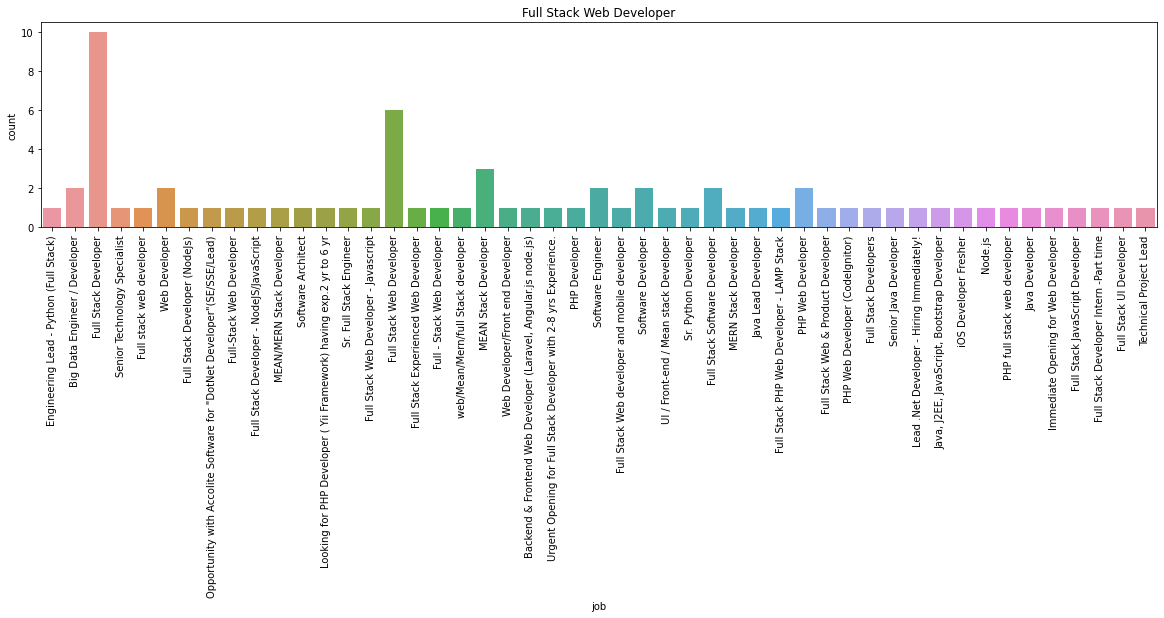

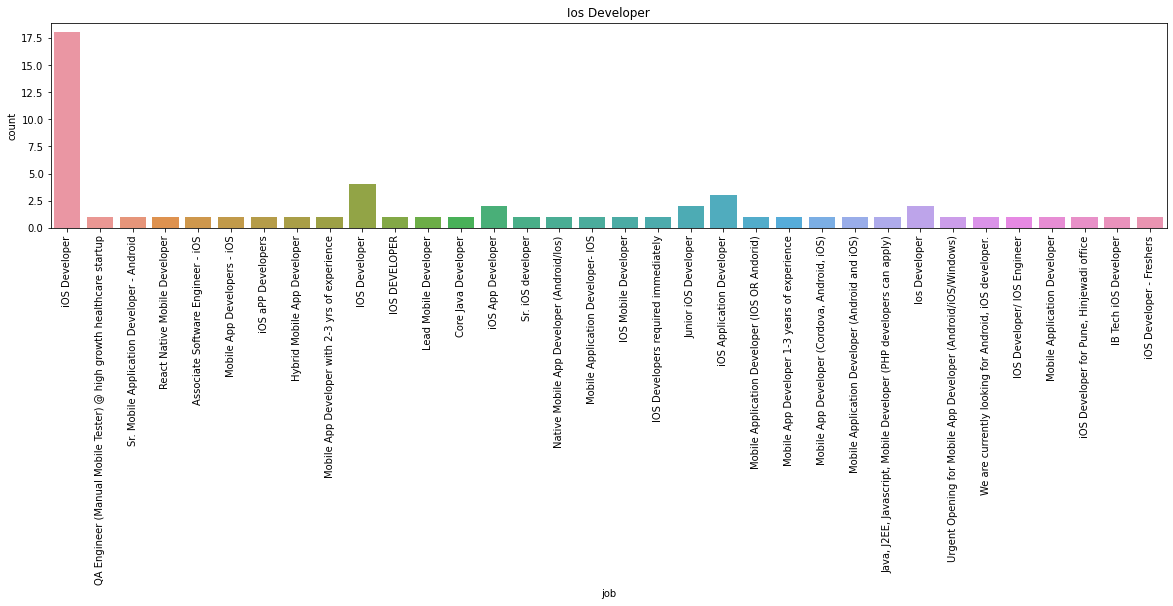

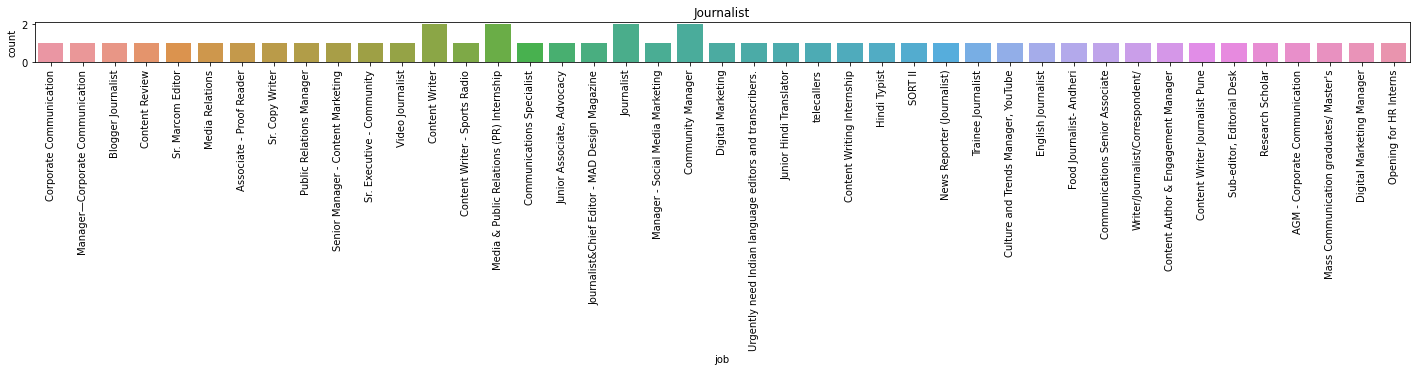

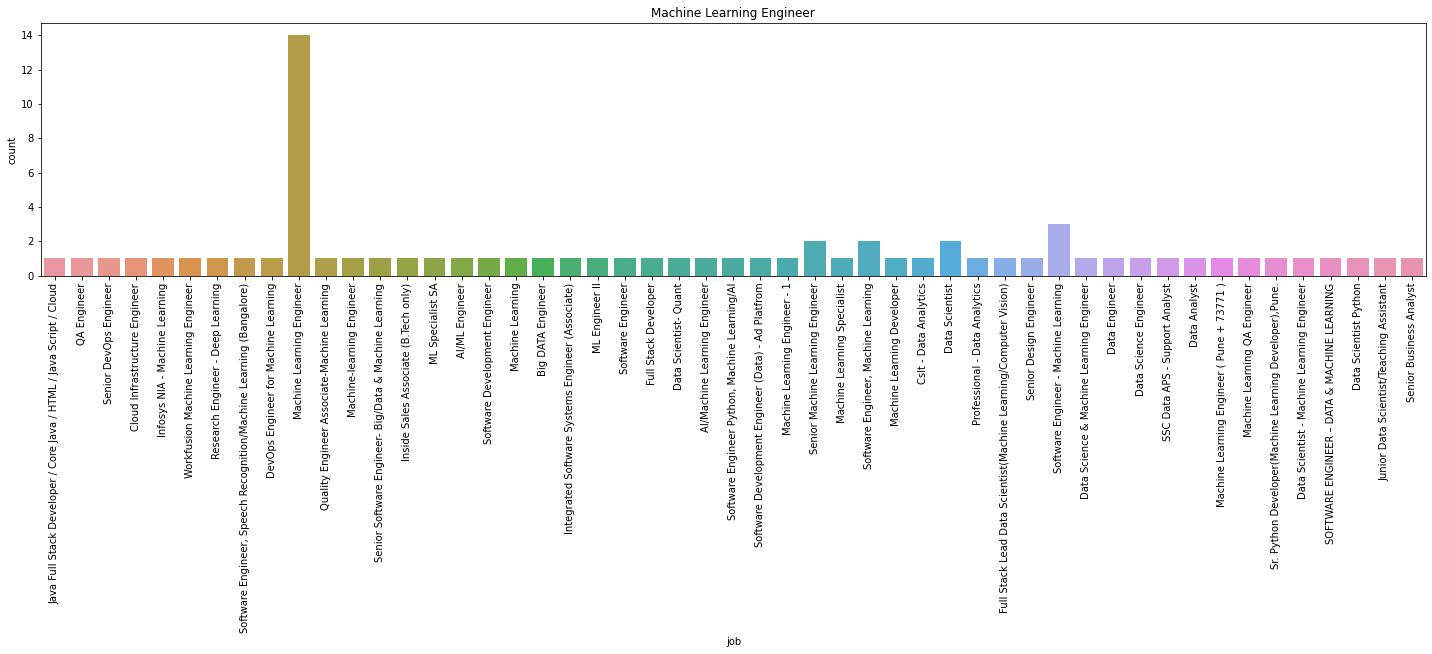

In [34]:
names=jobs.job_type.unique()
types=jobs[['job','job_type']]

for a,i in enumerate(names):
    plt.figure(figsize=(20,40))
    plt.subplot(9,1,a+1)
    sns.countplot(types[types.job_type.isin([i])].job)
    plt.xticks(rotation=90)
    plt.title(i)
    plt.tight_layout()
    plt.show()

## 💡 insight:

## Amount of Profanity

### Analysis

In [36]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()[:20]

[('experience', 9),
 ('work', 9),
 ('job', 9),
 ('skills', 9),
 ('required', 9),
 ('years', 9),
 ('knowledge', 8),
 ('time', 8),
 ('team', 8),
 ('development', 7),
 ('preferred', 7),
 ('design', 6),
 ('year', 6),
 ('working', 6),
 ('applications', 5),
 ('developer', 5),
 ('services', 5),
 ('data', 5),
 ('code', 4),
 ('understanding', 4)]

In [37]:
# as i am data sceintist i need both data knowledge and coding knowledge too so i want to see the requirment of both at diffrent job profile.
data_p=data.T[['data','code']]
data_p

,data,code
Android Developer,28,65
Backend Developer,48,79
Data Analyst,317,1
Data Scientist,433,11
Front End Developer,23,70
Full Stack Web Developer,111,54
Ios Developer,25,46
Journalist,13,1
Machine Learning Engineer,268,21


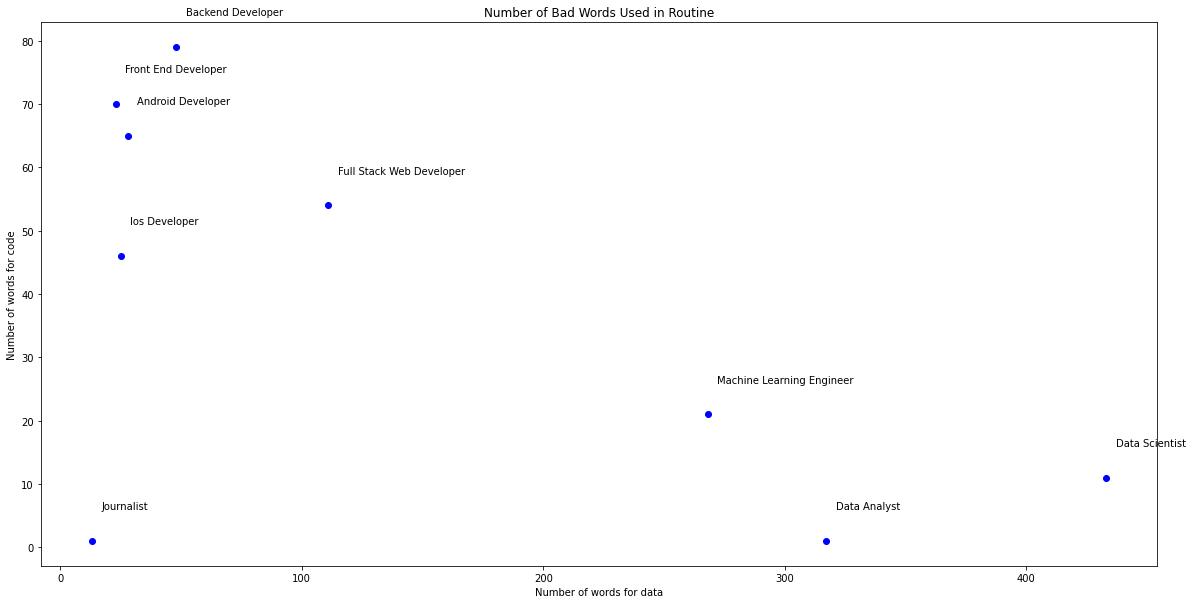

In [38]:
# Let's create a scatter plot of our findings
plt.figure(figsize=(20,10))
for i, job in enumerate(data_p.index):
    x = data_p.data.loc[job]
    y = data_p.code.loc[job]
    plt.scatter(x, y, color='blue')
    plt.text(x+4, y+5, job)
    
plt.title('Number of Bad Words Used in Routine')
plt.xlabel('Number of words for data')
plt.ylabel('Number of words for code')

plt.show()

## 💡 insight:
1. data scientist ,data analyst,machinelearning engineer have required knowledge of Data
2. Front end developer,Android developer, Ios developer,full stack web developer have required knowledge of code
3. Journalist doesnot require the any of this knowledge

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.


# Topic Modeling

## Introduction

Another popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

In this notebook, we will be covering the steps on how to do **Latent Dirichlet Allocation (LDA)**, which is one of many topic modeling techniques. It was specifically designed for text data.

To use a topic modeling technique, you need to provide (1) a document-term matrix and (2) the number of topics you would like the algorithm to pick up.

Once the topic modeling technique is applied, your job as a human is to interpret the results and see if the mix of words in each topic make sense. If they don't make sense, you can try changing up the number of topics, the terms in the document-term matrix, model parameters, or even try a different model.

## Topic Modeling - Attempt #1 (All Text)

In [39]:
# One of the required inputs is a term-document matrix
data_stop.head()

,aaa,aaai,aadhar,aao,ab,abandoned,abap,abfl,abhfl,abhijit,...,zeta,zettamine,zip,zippr,zone,zones,zookeeper,zoom,zurich,zycus
Android Developer,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Backend Developer,0,0,2,0,0,0,4,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Data Analyst,0,0,0,1,3,1,0,1,1,1,...,1,0,0,0,4,1,0,1,0,0
Data Scientist,0,2,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,3,0,1,8
Front End Developer,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
from gensim import matutils, models,corpora
import scipy.sparse

In [41]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(data_stop)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [42]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
id2word = dict((v, k) for k, v in cv.vocabulary_.items())# cv has stored the all counting id

In [43]:
cv.vocabulary_.items()
corpus

`Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.`

In [84]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.014*"development" + 0.011*"web" + 0.011*"design" + 0.008*"end" + 0.008*"android" + 0.008*"applications" + 0.007*"developer" + 0.007*"understanding" + 0.007*"team" + 0.007*"time"'),
 (1,
  '0.021*"data" + 0.010*"business" + 0.008*"learning" + 0.006*"team" + 0.006*"machine" + 0.005*"analytics" + 0.004*"time" + 0.004*"development" + 0.004*"working" + 0.004*"strong"')]

In [85]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.022*"data" + 0.010*"business" + 0.009*"learning" + 0.006*"machine" + 0.006*"team" + 0.005*"analytics" + 0.004*"time" + 0.004*"analysis" + 0.004*"working" + 0.004*"research"'),
 (1,
  '0.015*"web" + 0.012*"development" + 0.010*"end" + 0.010*"design" + 0.008*"javascript" + 0.007*"html" + 0.007*"understanding" + 0.007*"team" + 0.007*"css" + 0.007*"time"'),
 (2,
  '0.023*"android" + 0.018*"development" + 0.014*"design" + 0.012*"ios" + 0.012*"mobile" + 0.010*"applications" + 0.008*"app" + 0.008*"developer" + 0.007*"code" + 0.007*"working"')]

In [87]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.018*"data" + 0.015*"learning" + 0.012*"machine" + 0.007*"team" + 0.007*"software" + 0.006*"business" + 0.005*"science" + 0.005*"analytics" + 0.005*"working" + 0.005*"development"'),
 (1,
  '0.001*"data" + 0.001*"development" + 0.001*"design" + 0.001*"strong" + 0.001*"web" + 0.001*"applications" + 0.001*"business" + 0.001*"working" + 0.001*"learning" + 0.000*"team"'),
 (2,
  '0.012*"development" + 0.010*"design" + 0.009*"web" + 0.007*"android" + 0.007*"time" + 0.007*"team" + 0.007*"end" + 0.006*"applications" + 0.006*"understanding" + 0.006*"developer"'),
 (3,
  '0.037*"data" + 0.015*"business" + 0.009*"learning" + 0.009*"analytics" + 0.007*"analysis" + 0.006*"machine" + 0.005*"research" + 0.005*"solutions" + 0.005*"team" + 0.004*"statistical"')]

In [88]:
pd.DataFrame(list(lda[corpus]),index=dtm.index,columns=['Topic(A)','Topic(B)'])

,Topic(A),Topic(B)
Android Developer,"(2, 0.99990207)",None
Backend Developer,"(2, 0.99991435)",None
Data Analyst,"(2, 0.4838175)","(3, 0.51614153)"
Data Scientist,"(3, 0.9988831)",None
Front End Developer,"(2, 0.9999199)",None
Full Stack Web Developer,"(2, 0.9999317)",None
Ios Developer,"(2, 0.9998752)",None
Journalist,"(2, 0.99988157)",None
Machine Learning Engineer,"(0, 0.997176)",None


## 💡 insight:
1. i am preaty convinced with 3 topics and also satisfied the requirment withe term
2. data Analyst is combined of topic 0 with 48.3% and 3 with 51.7%

What was our goal for the EDA portion of